## Lending Club Case Study

In [126]:
#import libraries
import pandas as pd
import numpy as np

In [2]:
# read the dataset into a data frame

df = pd.read_csv('./loan.csv',parse_dates = ['next_pymnt_d'])

Get first look at the data

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
df.shape

(39717, 111)

Get initial meta data for columns such as null and unique values

In [6]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
                              ...  
tax_liens                         1
tot_hi_cred_lim                   0
total_bal_ex_mort                 0
total_bc_limit                    0
total_il_high_credit_limit        0
Length: 111, dtype: int64

In [8]:
df.isna().sum().sort_values(ascending=False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

## DATA CLEANUP


# Fixing Rows
| Checklist Item      | Analysis |
| ----------- | ----------- |
| Delete incorrect rows      | No such rows found       |
| Delete summary rows   | No such rows found        |
| Delete extra rows   | No such rows found        |

After manual checking of csv, no such rows found

# Fixing Columns
| Checklist Item      | Analysis |
| ----------- | ----------- |
| Add column names if missing      | No such columns found       |
| Rename columns   | No such columns found        |
| Delete unnecessary columns   | Columns with all empty values found        |
| Split columns for more data   | URL and date columns can be split, desc column has a date if required        |
| Merge columns for identifiers   | No such columns found        |
| Align misaligned columns   | No such columns found        |

In [9]:
# dropping columns which have no data
df.dropna(axis=1,how='all',inplace=True)
df.isna().sum().sort_values(ascending=False)

next_pymnt_d                  38577
mths_since_last_record        36931
mths_since_last_delinq        25682
desc                          12940
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
home_ownership                    0
int_rate                          0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
term                              0
last_pymnt_amnt                   0
initial_list_status               0
funded_amnt_inv             

# Fix Missing Values
| Checklist Item      | Analysis |
| ----------- | ----------- |
| Set values as missing values      | No such values found       |
| Delete rows, columns with significant missing values   | Two columns with more than 85% missing values identified       |
| Fill partial missing values using business judgement   | No such opportunity identified      |

In [10]:
# dropping columns with more than 85% missing values
df.drop(['next_pymnt_d','mths_since_last_record'], axis=1, inplace=True)
df.isna().sum().sort_values(ascending=False)

mths_since_last_delinq        25682
desc                          12940
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
out_prncp                         0
initial_list_status               0
out_prncp_inv                     0
total_pymnt                       0
total_acc                         0
total_pymnt_inv                   0
recoveries                        0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
pub_rec                           0
collection_recovery_fee           0
last_pymnt_amnt                   0
policy_code                       0
application_type                  0
acc_now_delinq              

# Standardising Values
| Checklist Item      | Analysis |
| ----------- | ----------- |
| Standardise units      |  Unit symbols - (months, %) can be removed   |
| Scale values if required   |   All units have proper scale     |
| Standardise precision   | Decimal precision can be brought to two decimal places     |
| Remove outliers   |      |

In [11]:
# remove unit symbols
df['term'] = df['term'].apply(lambda x: int(x.replace('months','').replace(' ','')))
df['int_rate'] = df['int_rate'].apply(lambda x: float(x.replace('%','')))
df['revol_util'] = df['revol_util'].apply(lambda x: float(str(x).replace('%','')))

In [12]:
# standardise decimal places
df.round({'funded_amnt_inv': 2, 'total_pymnt':2, 'total_rec_late_fee':2, 'total_pymnt_inv':2})

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36,8.07,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36,10.28,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36,8.07,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36,7.43,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


# Invalid Values
| Checklist Item      | Analysis |
| ----------- | ----------- |
| Encode unicode properly     |  All values are encoded correctly   |
| Convert incorrect data types   |    Data types have been fixed for int_rate, revol_util, term   |
| Correct values that go beyond range   | No such values found     |
| Correct values not in the list   |    No such values found  |
| Correct wrong structure   |  No such values found    |
| Validate internal rules   |  No such rules provided    |

# Filtering Data
| Checklist Item      | Analysis |
| ----------- | ----------- |
| Deduplicate data     |  No such rows found   |
| Filter rows   |  Only "Charged Off" loans are required for analysis     |
| Filter columns   | loan_amnt,  term, int_rate, grade, sub_grade,  annual_inc, purpose, dti, emp_length, issue_d, home_ownership,  verification_status |

In [13]:
# checking for duplicate rows
df[df.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [20]:
# filtering bad loans
charged_off_loans_df = df[(df["loan_status"] == "Charged Off")]
charged_off_loans_df["loan_status"].value_counts()

Charged Off    5627
Name: loan_status, dtype: int64

# Univariate Analysis

Analyzing each variable independently to reveal insights.

In [22]:
# importing libraries for visualizations
import seaborn as sns
import matplotlib.pyplot as plt

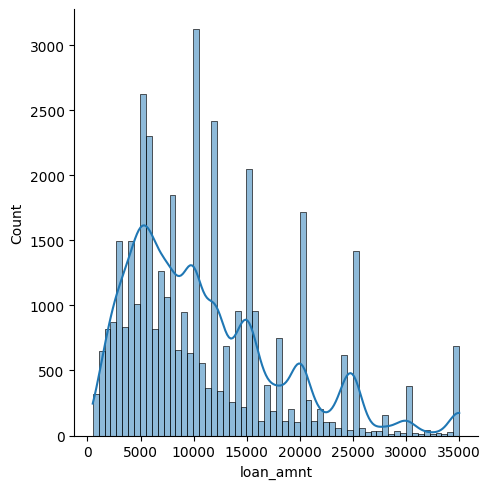

In [151]:
# loan amount
sns.displot(data=df, x="loan_amnt", kde=True)

In [152]:
df["loan_amnt"].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<AxesSubplot: xlabel='loan_amnt'>

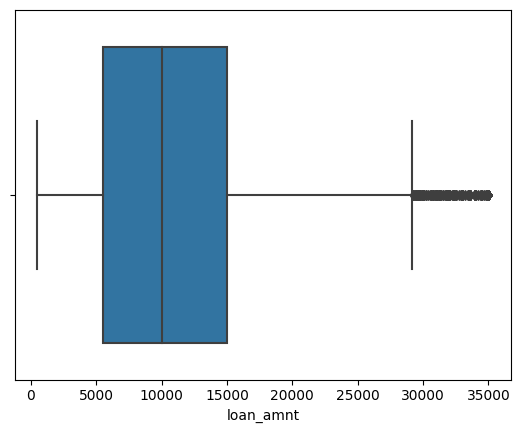

In [153]:
sns.boxplot(x=df['loan_amnt'])

In [154]:
df[(df['loan_amnt']>=35000)]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
80,1068994,1303432,35000,22075,22050.00000,60,17.27,551.84,D,D3,...,15660.22,Feb-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
128,1068159,1302729,35000,35000,35000.00000,36,8.90,1111.37,A,A5,...,1123.85,Mar-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
185,1067084,1301459,35000,35000,35000.00000,36,10.65,1140.07,B,B2,...,272.59,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
268,1066155,1277661,35000,26825,26800.00000,60,18.64,690.56,E,E1,...,26684.35,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
276,1065896,1300036,35000,35000,35000.00000,36,8.90,1111.37,A,A5,...,27308.49,Oct-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19498,672549,859736,35000,35000,29012.68626,60,17.14,872.48,E,E3,...,872.20,Feb-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
19578,673070,860334,35000,35000,34975.00000,60,17.51,879.47,E,E4,...,879.47,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
19604,672680,859881,35000,35000,34950.00000,60,16.40,858.59,E,E1,...,35479.89,Mar-11,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
19740,670409,857058,35000,35000,31845.22117,60,18.99,907.73,F,F3,...,21923.25,Oct-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


## loan amount insights
- amounts range from 500 to 35000
- most asked loans are around 10000

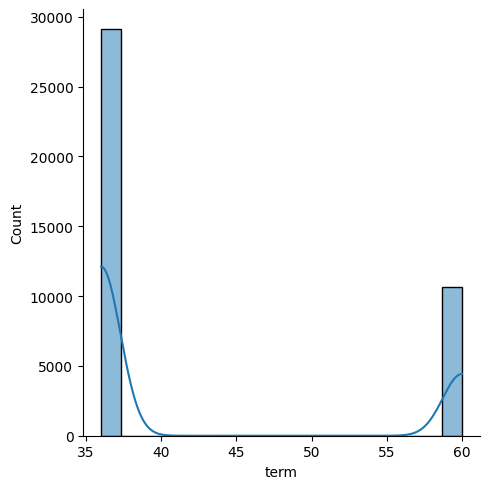

In [155]:
# term
sns.displot(data=df, x="term", kde=True)

In [156]:
df["term"].value_counts()

36    29096
60    10621
Name: term, dtype: int64

<AxesSubplot: xlabel='term'>

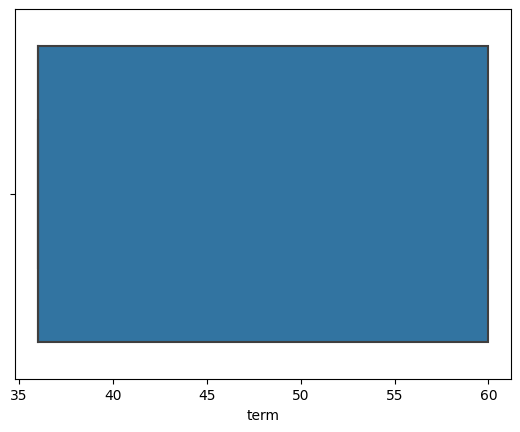

In [157]:
sns.boxplot(x=df['term'])

## term insights
- among the loans, only two term durations were given
  - 3 years
  - 5 years

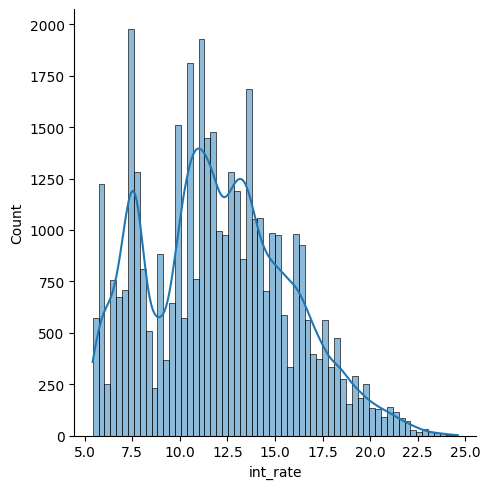

In [158]:
# int_rate
sns.displot(data=df, x="int_rate", kde=True)

In [159]:
df["int_rate"].describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

<AxesSubplot: xlabel='int_rate'>

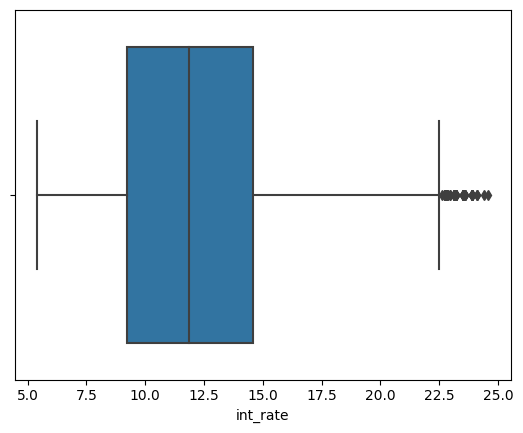

In [160]:
sns.boxplot(x=df['int_rate'])

## interest rate insights
- interest rates start from 5.4% and go all the way up to 24%
- most loans have an interest rate of around 10 to 15%

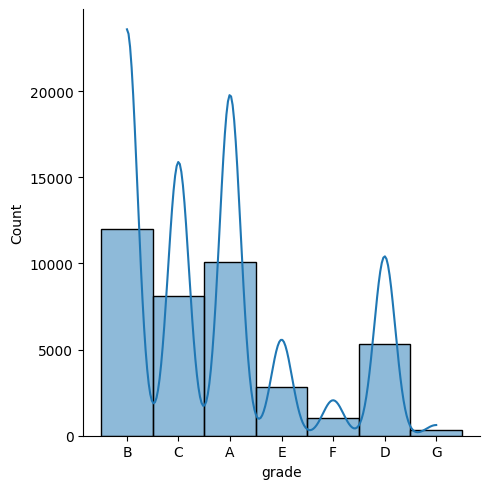

In [169]:
# grade
sns.displot(data=df, x="grade", kde=True)

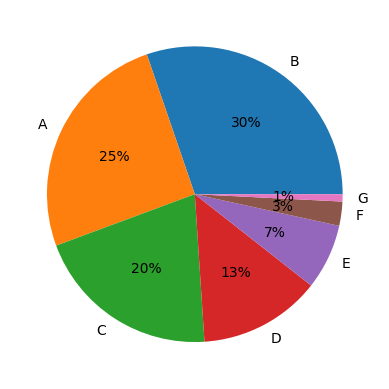

In [162]:
grades = df['grade'].value_counts()
plt.pie(grades,labels=grades.index,autopct="%.0f%%");


## grade insights
- majority of loans fall under A, B, C grades
- very few loans fall under G, F grades

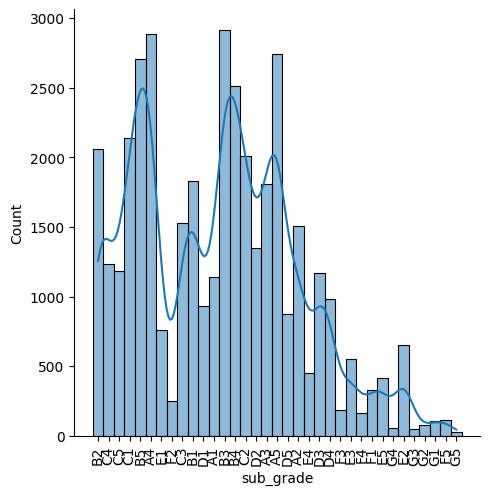

In [171]:
# sub grade
sns.displot(data=df, x="sub_grade", kde=True).set_xticklabels(rotation=90)

In [172]:
df['sub_grade'].value_counts()

B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: sub_grade, dtype: int64

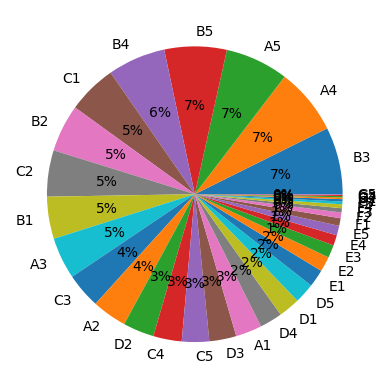

In [173]:
sub_grades = df['sub_grade'].value_counts()
plt.pie(sub_grades,labels=sub_grades.index,autopct="%.0f%%");

## sub-grade insights
- loans seem to have an equal distribution among the sub grades 

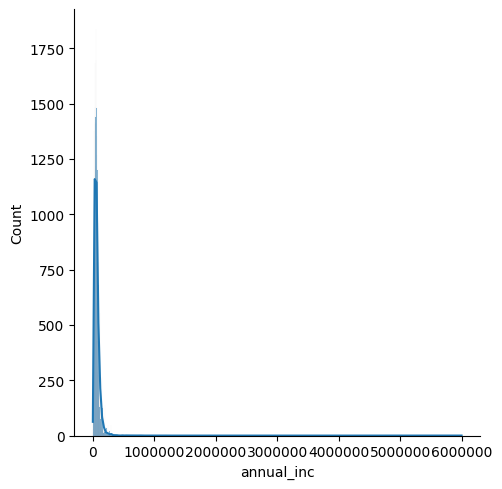

In [174]:
# annual income
sns.displot(data=df, x="annual_inc", kde=True)
plt.ticklabel_format(style='plain', axis='x') # this suppresses the scientific notation issue


In [175]:
df['annual_inc'].value_counts().sort_values(ascending=False)

60000.00    1505
50000.00    1057
40000.00     876
45000.00     830
30000.00     825
            ... 
37965.24       1
52526.00       1
76344.00       1
25740.00       1
27376.00       1
Name: annual_inc, Length: 5318, dtype: int64

In [176]:
df['annual_inc'].sort_values(ascending=False)

30107    6000000.0
29639    3900000.0
39089    2039784.0
23551    1900000.0
7247     1782000.0
           ...    
29567       4800.0
37709       4200.0
30726       4200.0
29283       4080.0
35501       4000.0
Name: annual_inc, Length: 39717, dtype: float64

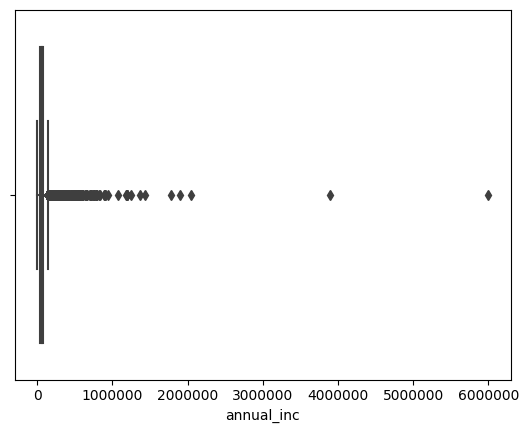

In [177]:
sns.boxplot(x=df['annual_inc'])
plt.ticklabel_format(style='plain', axis='x')


In [178]:
(df['annual_inc'] > 200000).sum()

586

In [179]:
df['annual_inc'].describe().apply(lambda x: format(x, 'f'))

count      39717.000000
mean       68968.926377
std        63793.765790
min         4000.000000
25%        40404.000000
50%        59000.000000
75%        82300.000000
max      6000000.000000
Name: annual_inc, dtype: object

In [181]:
# finding outliers
Q1 = charged_off_loans_df['annual_inc'].quantile(0.25)
Q3 = charged_off_loans_df['annual_inc'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[((df['annual_inc'] < (Q1 - 1.5 * IQR)) |(df['annual_inc'] > (Q3 + 1.5 * IQR)))]
outliers['annual_inc'].sort_values()


15873     121008.0
36648     121178.0
28219     121200.0
6978      121200.0
18748     121296.0
           ...    
7247     1782000.0
23551    1900000.0
39089    2039784.0
29639    3900000.0
30107    6000000.0
Name: annual_inc, Length: 3247, dtype: float64

In [182]:
outliers['annual_inc'].describe().apply(lambda x: format(x, 'f'))

count       3247.000000
mean      185118.840773
std       167614.106476
min       121008.000000
25%       133000.000000
50%       150000.000000
75%       185000.000000
max      6000000.000000
Name: annual_inc, dtype: object

In [92]:
# removing outliers
# charged_off_loans_df = charged_off_loans_df[~((charged_off_loans_df['annual_inc'] < (Q1 - 1.5 * IQR)) |(charged_off_loans_df['annual_inc'] > (Q3 + 1.5 * IQR)))]

In [93]:
# charged_off_loans_df['annual_inc'].describe().apply(lambda x: format(x, 'f'))

count      5367.000000
mean      55676.891137
std       25516.521797
min        4080.000000
25%       36000.000000
50%       51200.000000
75%       70000.000000
max      132000.000000
Name: annual_inc, dtype: object

## annual income insights
- outliers were detected above the 120000 income level and were removed
- majority of income distribution is around 30000 to 60000

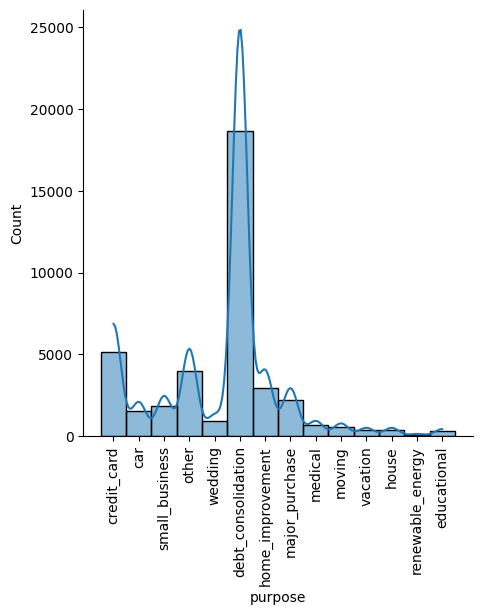

In [185]:
# purpose
sns.displot(data=df, x="purpose", kde=True).set_xticklabels(rotation=90)

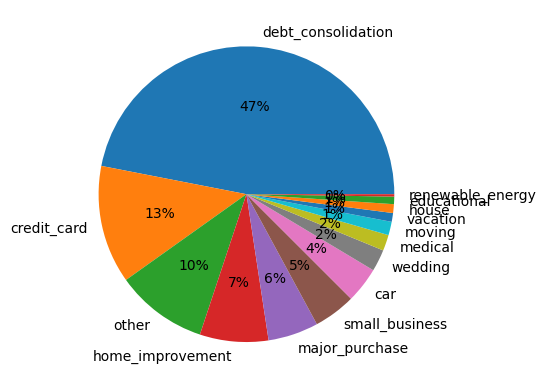

In [186]:
purpose = df['purpose'].value_counts()
plt.pie(purpose,labels=purpose.index,autopct="%.0f%%");

In [187]:
df['purpose'].value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

## purpose insights
- half of the loan applications were for debt consolidation, meaning people were asking for loan to clear other loans
- amongst the other half
  - credit card debt, small businesses and 'other' purposes were significant

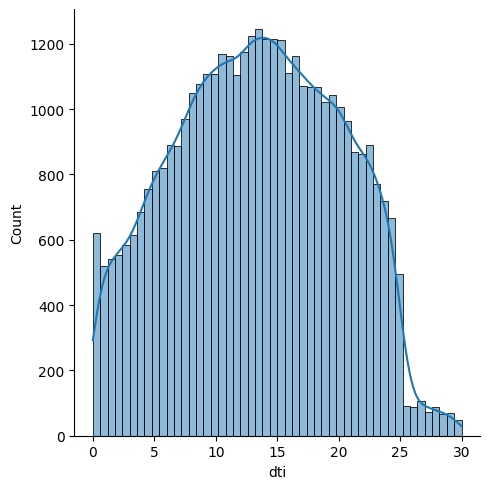

In [188]:
# debt to income ratio
sns.displot(data=df, x="dti", kde=True)

<AxesSubplot: xlabel='dti'>

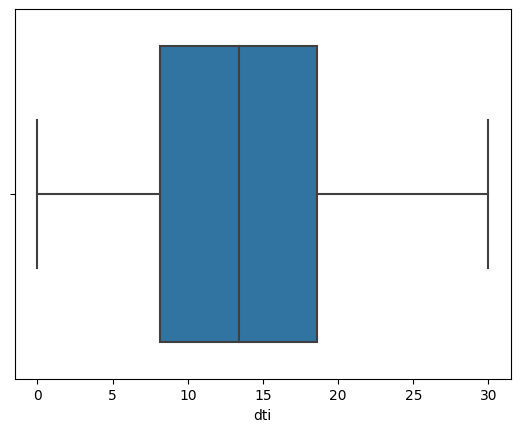

In [189]:
sns.boxplot(x=df['dti'])

In [190]:
df['dti'].sort_values(ascending=False)

12678    29.99
14991    29.95
10458    29.93
17153    29.93
16244    29.93
         ...  
12439     0.00
36092     0.00
16882     0.00
19353     0.00
14077     0.00
Name: dti, Length: 39717, dtype: float64

## debt to income ratio insights
- amongst the charged off loans, dti was distributed mostly between 7.5 to 25%

According to [Wikipedia](https://www.investopedia.com/terms/d/dti.asp)
- A DTI of 43% is typically the highest ratio a borrower can have and still get qualified for a mortgage, but lenders generally seek ratios of no more than 36%.
- This shows that, while applying for the loans their dti were up to the standard.

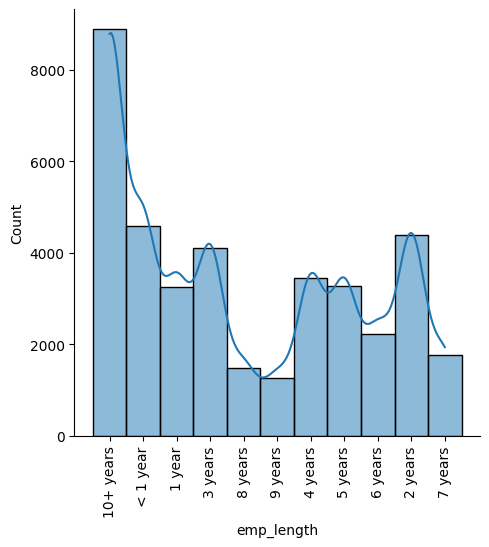

In [191]:
# employment length
sns.displot(data=df, x="emp_length", kde=True).set_xticklabels(rotation=90)

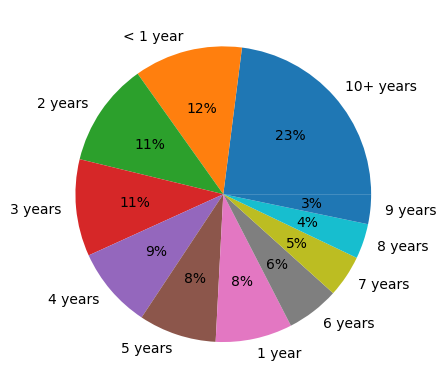

In [192]:
emp_length = df['emp_length'].value_counts()
plt.pie(emp_length,labels=emp_length.index,autopct="%.0f%%");

## employment length insights
- amongst the loans, about a quarter of loans had applicants with employment of more than 10 years
- more than half of the applications had employment of more than 5 years

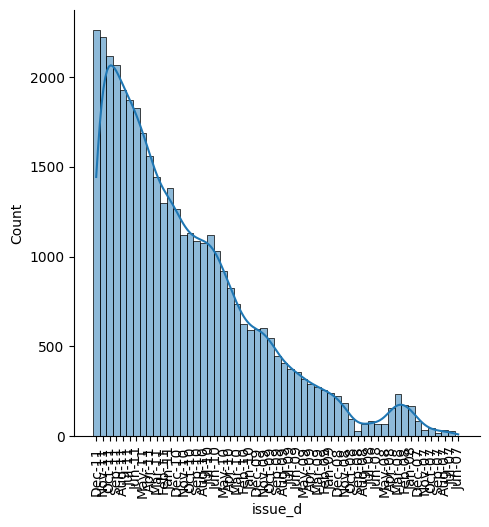

In [193]:
# issue date
sns.displot(data=df, x="issue_d", kde=True).set_xticklabels(rotation=90)

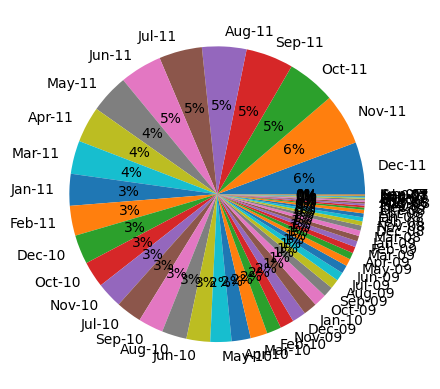

In [194]:
issue_d = df['issue_d'].value_counts()
plt.pie(issue_d,labels=issue_d.index,autopct="%.0f%%");

## issue date insights
- almost evenly distributed

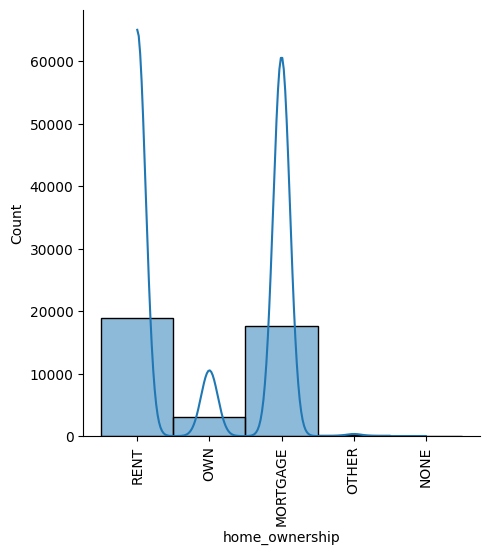

In [195]:
# home ownership
sns.displot(data=df, x="home_ownership", kde=True).set_xticklabels(rotation=90)

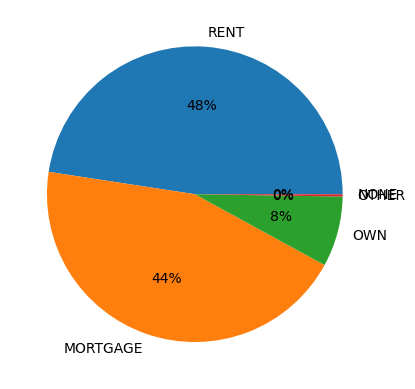

In [196]:
home_ownership = df['home_ownership'].value_counts()
plt.pie(home_ownership,labels=home_ownership.index,autopct="%.0f%%");

## home ownership insights
- more than 90% of loans don't own a home
- they are either living on rent or have an running mortgage

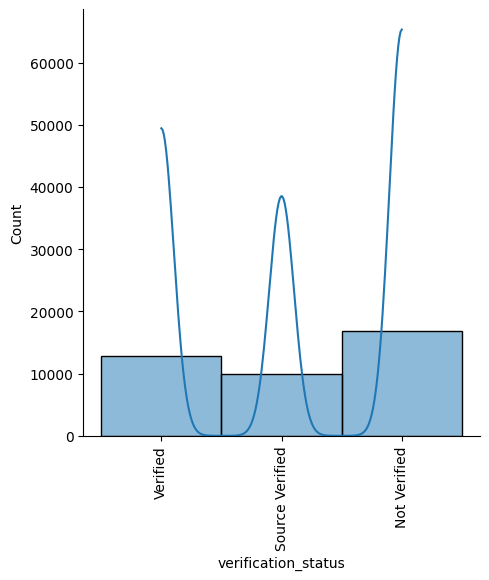

In [197]:
# verification status
sns.displot(data=df, x="verification_status", kde=True).set_xticklabels(rotation=90)

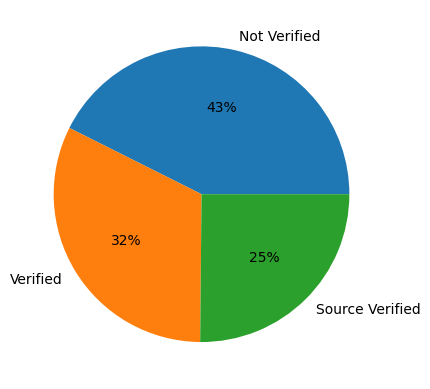

In [198]:
verification_status = df['verification_status'].value_counts()
plt.pie(verification_status,labels=verification_status.index,autopct="%.0f%%");

## verification status insights
- more than 50% of charged off loans had their income verified
- quarter of the applications had their income verified directly by the lending club

# Segmented Univariate Analysis

In [199]:
# by grade
df.groupby(by='grade').mean()

/var/folders/t_/lz6pz6gj6gng1mkk0pxszwkh0000gr/T/ipykernel_7906/3468366439.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by='grade').mean()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
grade,,,,,,,,,,,,,,,,,,,,,
A,695132.169162,866162.003471,8624.928111,8402.421914,8155.229508,37.035201,7.335262,256.757152,66648.847979,12.052141,...,20.387912,3.023844,1944.033577,0.0,1.0,0.0,0.0,0.0,0.012873,0.0
B,685231.132779,853223.287687,11119.080699,10861.335275,10327.162203,41.369052,11.021224,321.024384,67639.958014,13.430587,...,58.684082,6.692019,2673.273910,0.0,1.0,0.0,0.0,0.0,0.044789,0.0
C,658180.856508,816873.480119,11004.670906,10779.263398,10051.275649,42.961719,13.552960,319.675054,67939.195952,13.890301,...,103.395343,15.563399,2569.731719,0.0,1.0,0.0,0.0,0.0,0.058876,0.0
D,671556.251366,835944.677784,12278.198606,12069.789900,11381.815858,45.388355,15.719900,363.892996,68524.874605,13.957618,...,140.719382,18.677531,2887.003797,0.0,1.0,0.0,0.0,0.0,0.057544,0.0
E,705015.387051,879891.647431,15847.255454,15254.327938,14461.885999,52.669951,17.711714,428.536566,77989.406921,14.094947,...,236.459178,28.453310,4148.670732,0.0,1.0,0.0,0.0,0.0,0.062700,0.0
F,727162.748332,908615.548141,18363.298379,17688.417541,16891.627492,55.172545,19.749323,498.653813,84602.272059,14.121544,...,459.489675,55.865587,4627.515081,0.0,1.0,0.0,0.0,0.0,0.069632,0.0
G,711136.056962,891404.579114,20226.819620,19828.639241,18857.510145,55.746835,21.401044,574.744905,94386.473133,14.010854,...,420.277152,54.362746,5951.916203,0.0,1.0,0.0,0.0,0.0,0.057325,0.0


## grade insights
this is an ordered categorical

- as grade increases, average loan amount is increasing 
- as grade increases, average funded amount are increasing
- as grade increases, average term is increasing
- as grade increases, average interest rate is increasing
- as grade increases, average annual income is increasing
- as grade increases, dti is not varying much

In [200]:
# by purpose
df.groupby(by='purpose').mean()

/var/folders/t_/lz6pz6gj6gng1mkk0pxszwkh0000gr/T/ipykernel_7906/4015327912.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by='purpose').mean()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
purpose,,,,,,,,,,,,,,,,,,,,,
car,685234.639122,856881.934151,6777.517753,6714.299548,6503.168956,44.692059,10.530097,190.162395,61842.041666,11.155675,...,41.391222,4.992992,1696.718715,0.0,1.0,0.0,0.0,0.0,0.043081,0.0
credit_card,693159.731189,859439.998246,11723.615984,11452.153996,10864.040448,40.860819,11.701173,348.069437,70439.147793,14.608770,...,74.174326,11.724291,2692.513444,0.0,1.0,0.0,0.0,0.0,0.047099,0.0
debt_consolidation,697509.291132,868994.162920,12694.989539,12388.702323,11835.486099,43.094040,12.487890,366.238404,67322.059221,14.483085,...,114.114025,13.951243,3108.169193,0.0,1.0,0.0,0.0,0.0,0.046431,0.0
educational,424357.452308,501231.932308,6810.461538,6692.076923,5614.153691,37.181538,11.650831,218.109754,53471.374092,11.206185,...,76.021082,18.669311,1202.279815,0.0,1.0,0.0,0.0,0.0,0.026059,0.0
home_improvement,681248.501344,850097.381048,11537.205981,11220.446909,10652.242015,43.233871,11.400265,322.633995,89736.784946,11.125850,...,55.069852,5.946467,2981.711425,0.0,1.0,0.0,0.0,0.0,0.047814,0.0
house,683898.291339,848943.183727,13070.997375,12712.598425,12143.981844,43.622047,12.228136,371.539370,76772.283885,10.666063,...,138.276273,10.224820,3573.724383,0.0,1.0,0.0,0.0,0.0,0.039894,0.0
major_purchase,656925.737997,824655.233196,8155.429813,7970.244627,7655.749737,41.080933,10.843064,236.188711,66391.522904,10.815638,...,51.723122,7.032301,2030.696776,0.0,1.0,0.0,0.0,0.0,0.023524,0.0
medical,684214.152958,851690.405483,8263.672439,8103.391053,7736.703368,41.714286,11.492121,237.185988,68252.863766,12.174214,...,60.839192,7.161116,1967.331818,0.0,1.0,0.0,0.0,0.0,0.058480,0.0
moving,676180.070326,844641.114923,6650.171527,6506.946827,6269.678979,40.116638,11.563619,195.888165,61801.578302,11.741063,...,34.145609,4.494254,1460.024700,0.0,1.0,0.0,0.0,0.0,0.038328,0.0


## purpose insights
this is an unordered categorical

- maximum loan amounts were asked for debt consolidation and for small businesses
- minimum loan amounts were asked for moving and vacations

In [201]:
# by employment length
df.groupby(by='emp_length').mean()

/var/folders/t_/lz6pz6gj6gng1mkk0pxszwkh0000gr/T/ipykernel_7906/2745715846.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by='emp_length').mean()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
emp_length,,,,,,,,,,,,,,,,,,,,,
1 year,645444.596914,797202.661420,10168.495370,9932.021605,9072.697975,40.859259,12.063071,303.486546,62644.619630,13.072080,...,73.262631,11.704216,2353.432611,0.0,1.0,0.0,0.0,0.0,0.027954,0.0
10+ years,709719.460074,884800.541953,13089.970717,12730.073770,12213.275383,44.217142,12.094797,366.906737,81706.534351,13.716438,...,130.705178,15.620362,3194.429759,0.0,1.0,0.0,0.0,0.0,0.060502,0.0
2 years,658251.599818,818401.889927,10262.374658,10038.400182,9459.672631,41.332726,12.074045,304.120385,63274.658548,13.103719,...,75.735795,10.350994,2336.740950,0.0,1.0,0.0,0.0,0.0,0.031599,0.0
3 years,671607.676923,838433.881807,10738.278388,10457.973138,9931.553228,41.878388,12.019673,313.975219,66787.181446,13.163175,...,74.956217,10.921719,2561.391429,0.0,1.0,0.0,0.0,0.0,0.033713,0.0
4 years,685789.492724,855167.259313,10977.408324,10752.815774,10287.666726,42.118743,12.173417,321.323481,66583.756967,13.187616,...,83.032305,8.448239,2672.357957,0.0,1.0,0.0,0.0,0.0,0.033324,0.0
5 years,699221.461304,873210.627971,11287.035344,11047.981414,10605.058735,42.808044,12.035268,326.124299,68225.204153,13.421825,...,92.765855,11.231281,2759.569266,0.0,1.0,0.0,0.0,0.0,0.037550,0.0
6 years,719485.969493,895933.786451,11494.952894,11185.430686,10737.744225,43.149394,12.070314,328.405680,68184.618605,13.821350,...,101.742216,10.027677,2791.547061,0.0,1.0,0.0,0.0,0.0,0.046882,0.0
7 years,707577.661591,881437.046813,11739.495206,11501.776650,11068.836972,43.065990,12.174969,338.810180,69153.096943,13.674473,...,81.847994,11.152262,2735.883604,0.0,1.0,0.0,0.0,0.0,0.049115,0.0
8 years,685268.045301,852291.157539,11887.998648,11579.986477,11011.499562,42.977688,11.906302,341.006937,74590.468519,13.773793,...,108.130250,13.029825,3106.726592,0.0,1.0,0.0,0.0,0.0,0.051582,0.0


## employment length insights
this is an ordered categorical

- as employment length increases, average annual income is increasing
- as employment length increases, requested loan amount is increasing
- as employment length increases, interest rate remained around 13-14%
- as employment length increases, average loan term remained around 45 years
- as employment length increases, dti varied between 13-14%

In [202]:
# by home ownership
df.groupby(by='home_ownership').mean()

/var/folders/t_/lz6pz6gj6gng1mkk0pxszwkh0000gr/T/ipykernel_7906/3494623992.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by='home_ownership').mean()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
home_ownership,,,,,,,,,,,,,,,,,,,,,
MORTGAGE,693599.576080,864699.791325,12690.073051,12321.824565,11739.830419,43.686958,11.771737,357.009213,83116.963949,13.167808,...,108.452404,13.557468,3188.490051,0.0,1.0,0.0,0.0,0.0,0.050210,0.0
NONE,158141.333333,152646.666667,5600.000000,5600.000000,1592.686667,36.000000,8.696667,176.426667,80733.333333,11.746667,...,0.000000,0.000000,177.716667,0.0,1.0,0.0,0.0,0.0,NaN,0.0
OTHER,390487.642857,431096.836735,10663.010204,10148.724490,7354.949676,36.244898,12.040918,338.745714,71309.714286,11.251939,...,118.438556,18.703373,1767.746939,0.0,1.0,0.0,0.0,0.0,0.030612,0.0
OWN,677786.881622,844913.677567,10256.752780,10049.403205,9599.134625,41.941138,11.772642,299.833169,58863.322453,13.227665,...,97.642357,15.032952,2690.963846,0.0,1.0,0.0,0.0,0.0,0.040721,0.0
RENT,675816.751151,840344.786391,10004.853431,9814.105244,9289.491217,41.342505,12.294890,298.194824,57370.325969,13.477885,...,82.361973,10.874571,2205.759727,0.0,1.0,0.0,0.0,0.0,0.037205,0.0


## home ownership insights
this is an unordered categorical
- Mortgage applicants have higher average annual income
- Mortgage applicants are also the ones asking for higher loans with higher loan terms

In [203]:
# by verification status
df.groupby(by='verification_status').mean()

/var/folders/t_/lz6pz6gj6gng1mkk0pxszwkh0000gr/T/ipykernel_7906/3544210682.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by='verification_status').mean()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
verification_status,,,,,,,,,,,,,,,,,,,,,
Not Verified,619040.174517,767416.323090,8421.431948,8293.769576,7579.445141,39.408309,11.203965,258.687308,61053.026293,13.020394,...,54.871869,9.554460,1829.736157,0.0,1.0,0.0,0.0,0.0,0.045732,0.0
Source Verified,746151.533594,933471.409432,10099.829779,9880.016521,9644.765752,43.274257,12.106929,289.807134,68463.156973,12.613566,...,75.051350,7.698610,2480.801137,0.0,1.0,0.0,0.0,0.0,0.041554,0.0
Verified,718663.129987,895450.903271,15788.632992,15286.105473,14706.956818,45.726286,13.033872,438.681714,79820.363989,14.251482,...,164.251113,19.843588,3954.892045,0.0,1.0,0.0,0.0,0.0,0.041458,0.0


## verification status insights
this is an unordered categorical

- verified applicants received close to the amount requested
- surprisingly, unverified income source applicants got loans at a lower interest rate

# Bivariate analysis

In [204]:
# correlation matrix
df.corr()

/var/folders/t_/lz6pz6gj6gng1mkk0pxszwkh0000gr/T/ipykernel_7906/3752410677.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
id,1.000000,0.993650,0.141919,0.152286,0.249547,0.218589,0.078831,0.086587,0.008731,0.095983,...,0.033426,-0.013359,0.122365,NaN,NaN,NaN,NaN,NaN,-0.009505,NaN
member_id,0.993650,1.000000,0.140710,0.150322,0.257887,0.234265,0.074725,0.081025,0.009380,0.096963,...,0.031565,-0.015155,0.123627,NaN,NaN,NaN,NaN,NaN,-0.008769,NaN
loan_amnt,0.141919,0.140710,1.000000,0.981578,0.940034,0.361036,0.309415,0.930288,0.271149,0.066439,...,0.135446,0.072853,0.448742,NaN,NaN,NaN,NaN,NaN,-0.037180,NaN
funded_amnt,0.152286,0.150322,0.981578,1.000000,0.958422,0.340510,0.312619,0.956159,0.266965,0.066283,...,0.136284,0.074676,0.453133,NaN,NaN,NaN,NaN,NaN,-0.038502,NaN
funded_amnt_inv,0.249547,0.257887,0.940034,0.958422,1.000000,0.360747,0.306657,0.905039,0.254375,0.074689,...,0.123759,0.060358,0.442604,NaN,NaN,NaN,NaN,NaN,-0.042746,NaN
term,0.218589,0.234265,0.361036,0.340510,0.360747,1.000000,0.451699,0.101973,0.046675,0.082426,...,0.101351,0.031731,0.232915,NaN,NaN,NaN,NaN,NaN,0.011987,NaN
int_rate,0.078831,0.074725,0.309415,0.312619,0.306657,0.451699,1.000000,0.282703,0.053185,0.111162,...,0.122259,0.066380,0.157775,NaN,NaN,NaN,NaN,NaN,0.082550,NaN
installment,0.086587,0.081025,0.930288,0.956159,0.905039,0.101973,0.282703,1.000000,0.270874,0.054186,...,0.118152,0.075467,0.401688,NaN,NaN,NaN,NaN,NaN,-0.034103,NaN
annual_inc,0.008731,0.009380,0.271149,0.266965,0.254375,0.046675,0.053185,0.270874,1.000000,-0.122732,...,0.021589,0.015604,0.140401,NaN,NaN,NaN,NaN,NaN,-0.016801,NaN
dti,0.095983,0.096963,0.066439,0.066283,0.074689,0.082426,0.111162,0.054186,-0.122732,1.000000,...,0.024878,0.011033,0.005212,NaN,NaN,NaN,NaN,NaN,0.005691,NaN


/var/folders/t_/lz6pz6gj6gng1mkk0pxszwkh0000gr/T/ipykernel_7906/1898019920.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt="g", cmap='viridis')


<AxesSubplot: >

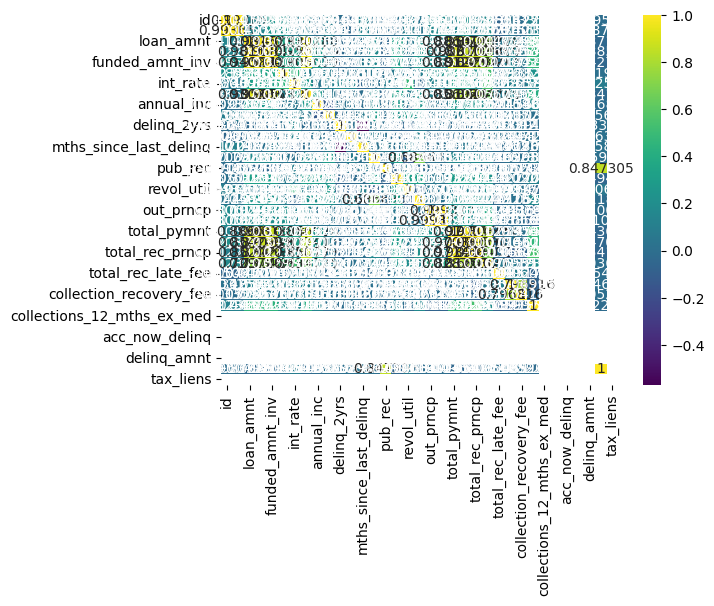

In [205]:
sns.heatmap(df.corr(), annot=True, fmt="g", cmap='viridis')

In [206]:
# loan amount vs purpose
pd.pivot_table(df, values=['loan_amnt'], index=['purpose'], aggfunc=np.mean)


,loan_amnt
purpose,
car,6777.517753
credit_card,11723.615984
debt_consolidation,12694.989539
educational,6810.461538
home_improvement,11537.205981
house,13070.997375
major_purchase,8155.429813
medical,8263.672439
moving,6650.171527


In [207]:
# loan amount vs employment length
pd.pivot_table(df, values=['loan_amnt'], index=['emp_length'], aggfunc=np.mean)


,loan_amnt
emp_length,
1 year,10168.495370
10+ years,13089.970717
2 years,10262.374658
3 years,10738.278388
4 years,10977.408324
5 years,11287.035344
6 years,11494.952894
7 years,11739.495206
8 years,11887.998648


In [208]:
# loan amount vs home ownership
pd.pivot_table(df, values=['loan_amnt'], index=['home_ownership'], aggfunc=np.mean)


,loan_amnt
home_ownership,
MORTGAGE,12690.073051
NONE,5600.000000
OTHER,10663.010204
OWN,10256.752780
RENT,10004.853431


In [209]:
# loan amount vs grade
pd.pivot_table(df, values=['loan_amnt'],columns=['grade'] ,index=['sub_grade'], aggfunc=np.mean)


loan_amnt                                            \
grade                A             B             C             D   
sub_grade                                                          
A1         7261.040386           NaN           NaN           NaN   
A2         7361.306366           NaN           NaN           NaN   
A3         7886.698895           NaN           NaN           NaN   
A4         9327.676715           NaN           NaN           NaN   
A5         9634.071845           NaN           NaN           NaN   
B1                 NaN   9772.759563           NaN           NaN   
B2                 NaN  10548.006806           NaN           NaN   
B3                 NaN  11584.316078           NaN           NaN   
B4                 NaN  11451.283838           NaN           NaN   
B5                 NaN  11654.169749           NaN           NaN   
C1                 NaN           NaN  11206.425562           NaN   
C2                 NaN           NaN  11436.176032           NaN   
C3                 NaN           NaN  10869.980379           NaN   
C4                 NaN           NaN  10528.499191           NaN   
C5                 NaN           NaN  10579.532040           NaN   
D1                 NaN           NaN           NaN  10008.404941   
D2                 NaN           NaN           NaN  11550.148368   
D3                 NaN           NaN           NaN  12594.778346   
D4                 NaN           NaN           NaN  13526.172273   
D5                 NaN           NaN           NaN  13993.278032   
E1                 NaN           NaN           NaN           NaN   
E2                 NaN           NaN           NaN           NaN   
E3                 NaN           NaN           NaN           NaN   
E4                 NaN           NaN           NaN           NaN   
E5                 NaN           NaN           NaN           NaN   
F1                 NaN           NaN           NaN           NaN   
F2                 NaN           NaN           NaN           NaN   
F3                 NaN           NaN           NaN           NaN   
F4                 NaN           NaN           NaN           NaN   
F5                 NaN           NaN           NaN           NaN   
G1                 NaN           NaN           NaN           NaN   
G2                 NaN           NaN           NaN           NaN   
G3                 NaN           NaN           NaN           NaN   
G4                 NaN           NaN           NaN           NaN   
G5                 NaN           NaN           NaN           NaN   

                                                     
grade                 E             F             G  
sub_grade                                            
A1                  NaN           NaN           NaN  
A2                  NaN           NaN           NaN  
A3                  NaN           NaN           NaN  
A4                  NaN           NaN           NaN  
A5                  NaN           NaN           NaN  
B1                  NaN           NaN           NaN  
B2                  NaN           NaN           NaN  
B3                  NaN           NaN           NaN  
B4                  NaN           NaN           NaN  
B5                  NaN           NaN           NaN  
C1                  NaN           NaN           NaN  
C2                  NaN           NaN           NaN  
C3                  NaN           NaN           NaN  
C4                  NaN           NaN           NaN  
C5                  NaN           NaN           NaN  
D1                  NaN           NaN           NaN  
D2                  NaN           NaN           NaN  
D3                  NaN           NaN           NaN  
D4                  NaN           NaN           NaN  
D5                  NaN           NaN           NaN  
E1         14761.041940           NaN           NaN  
E2         15179.496951           NaN           NaN  
E3         15557.233273           NaN           NaN  
E4         16764.262115 

<AxesSubplot: xlabel='grade', ylabel='loan_amnt'>

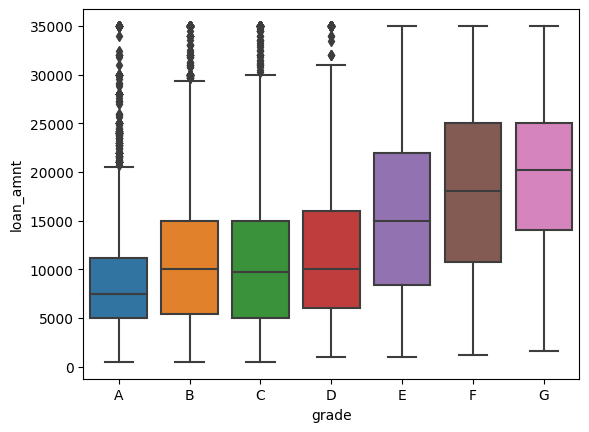

In [210]:
# box plot for loan amount vs grade
sns.boxplot(data=df,x='grade',y='loan_amnt',order=['A','B','C','D','E','F','G'])

[Text(0, 0, 'credit_card'),
 Text(1, 0, 'car'),
 Text(2, 0, 'small_business'),
 Text(3, 0, 'other'),
 Text(4, 0, 'wedding'),
 Text(5, 0, 'debt_consolidation'),
 Text(6, 0, 'home_improvement'),
 Text(7, 0, 'major_purchase'),
 Text(8, 0, 'medical'),
 Text(9, 0, 'moving'),
 Text(10, 0, 'vacation'),
 Text(11, 0, 'house'),
 Text(12, 0, 'renewable_energy'),
 Text(13, 0, 'educational')]

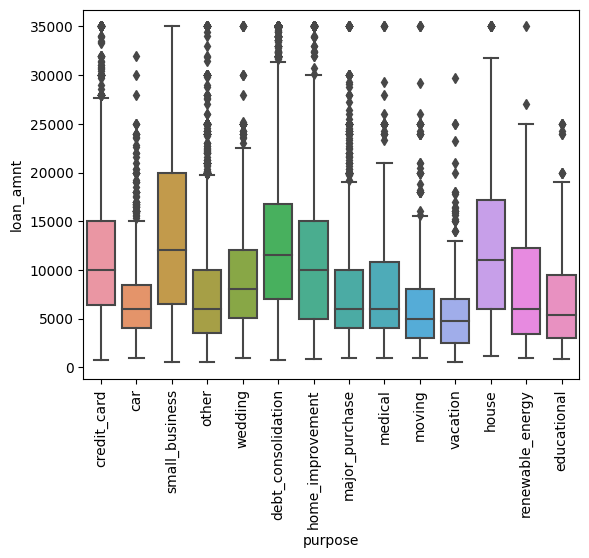

In [211]:
# box plot for loan amount vs purpose
ax = sns.boxplot(data=df,x='purpose',y='loan_amnt')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)